In [1]:
import pandas as pd
from data.datamapping import k,s, z, flags, wes_show, del_mu, data_dir, process_step, data_out,img_out_path, plots
from data.datamapping import file_name, data_cols, dis_list, dis_flag, R_v, R, A, mag, colors, R_dic, extinction_ratios
from lvtlaw.main_modules import intro
#intro()
raw_file = '143_Cepheids'
data = pd.read_csv(f'data/input/{raw_file}.csv')
#radial velocity and photometry for IRSB ralial voelocity, V and K band
#data = data[['name', 'logP', dis_list[0], 'EBV', 'B_mag', 'V_mag', 'I_mag', 'J_mag', 'H_mag', 'K_mag']]
#data = data.sort_values(by = ['logP'],ascending=True).dropna().reset_index(drop=True)

* * datamapping module loaded!
* * a_utils module loaded!
* * b_data_transform module loaded!
* * c_pl_pw module loaded!
* * d_del_del module loaded!
* * e_error_estimation module loaded!
* * f_star_wise module loaded!
* * datamapping module loaded!
* * main_modules module loaded!


# Outliers

In [ ]:
mask = data['name'] == 'BMPer'
'''
del_KHK < -0.6
29 RZ Gem
56 RX Cam 
75 SV Per

del_KHK < -0.6
14 WW Mon 
85 CY Aur 
93 RW Cam 

del_JHK < -0.7
V0495Cyg
V1344Aql
VXPer

del_JHK > 1
CKSct
WSgr

result99p
VXCyg
UZSct

result99j
BMPer

deldel 61
log period
KNCen

# from 136 Cepheid (overtone filtered)
bv = [137, ]
bi = [136, 131]
bj = [112,6,110,75,87]
bh = [112,6,110,95,122]
bk = [112,6,110,95,122,75,87]
vi = [0,55,95,112,110,75,87]
vj = [95,110,75,87,122]
vh = [95,75,87,93,110,122,134]
vk = [95,110,75,87,93,122,134, 77]
ij = [87,95,134,65,0,11,55,110,113,112]
ih = [65,87,95,134,0,55,113,112,110,93,103,111,127]
ik = [53,65,87,95,134,0,55,103,113,110,112,93]
jh = [115,134,110, 135, 126, 117]
jk = [115,95,134,93, 133]

'''
# Get the row indices
indices = data.index[mask].tolist()
print(indices)

[120]


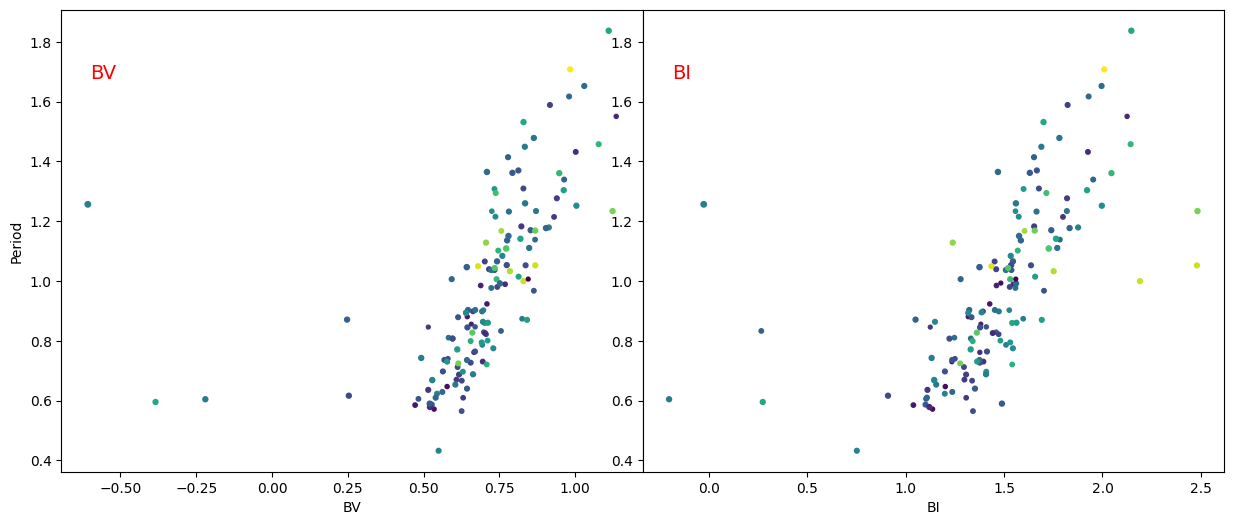

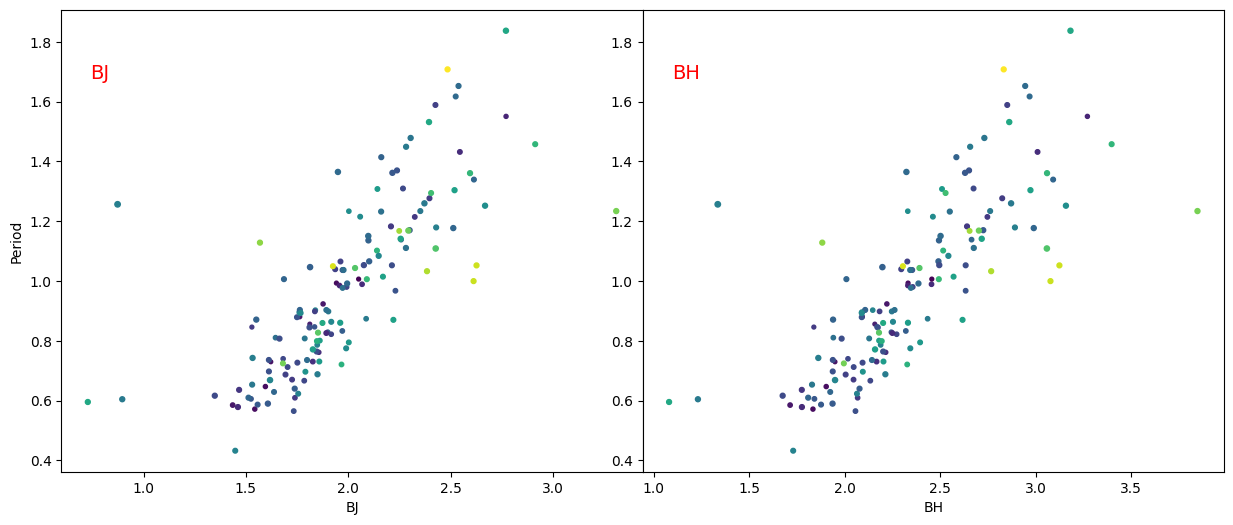

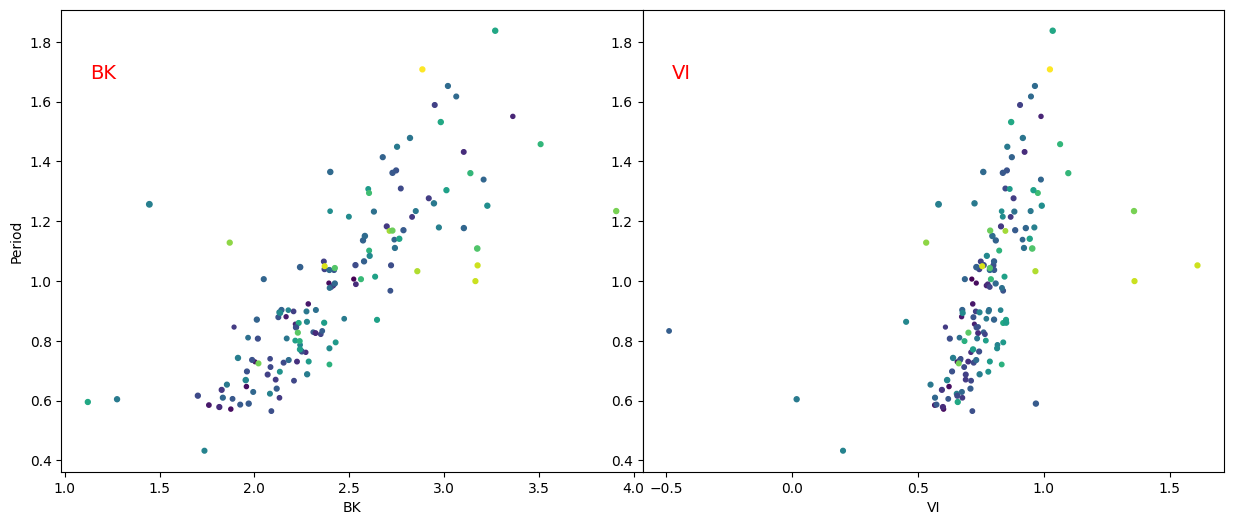

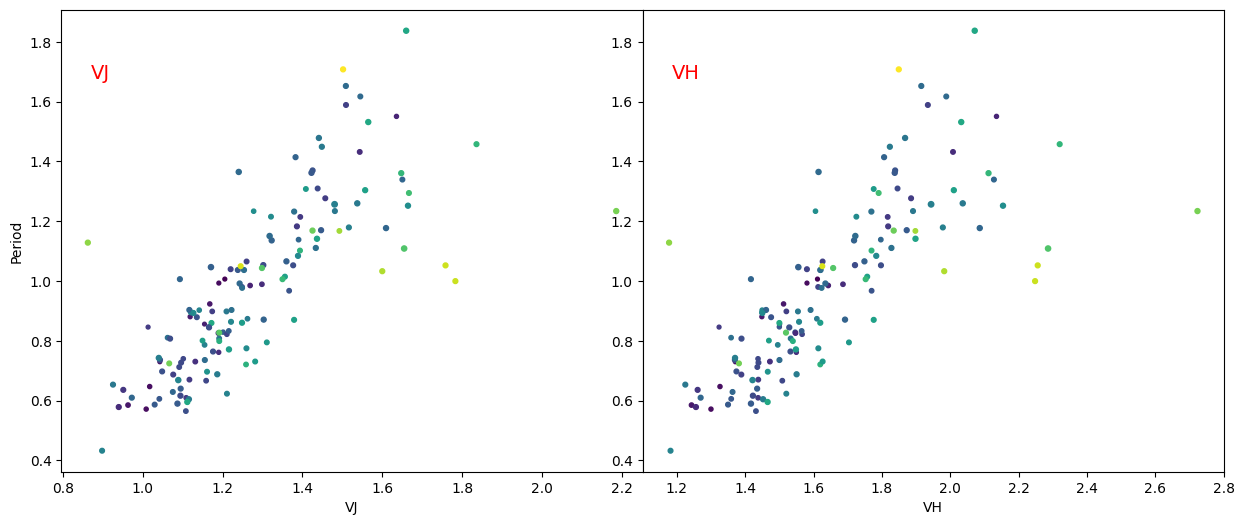

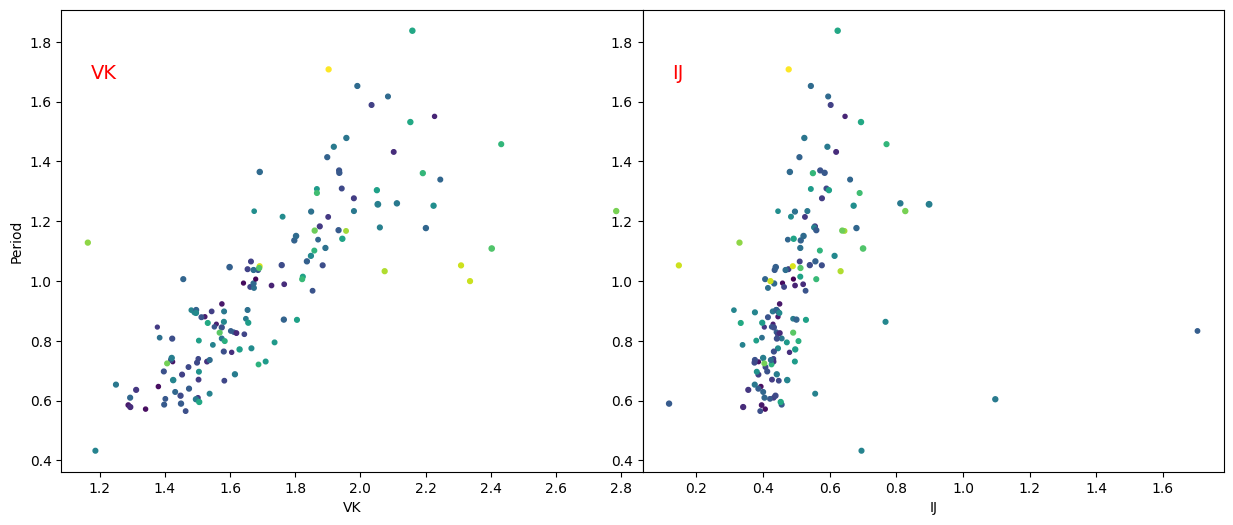

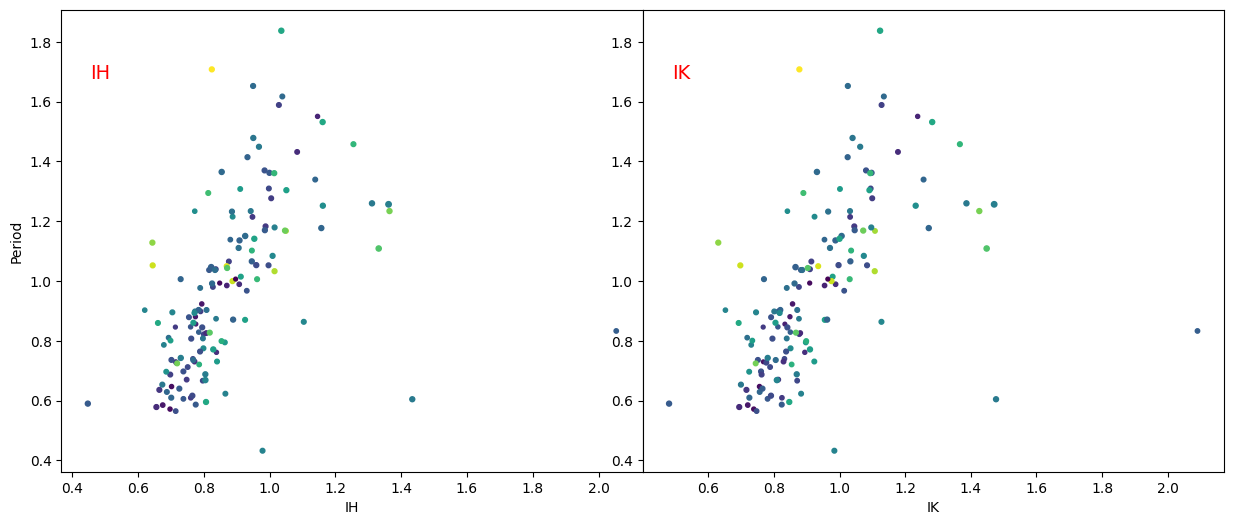

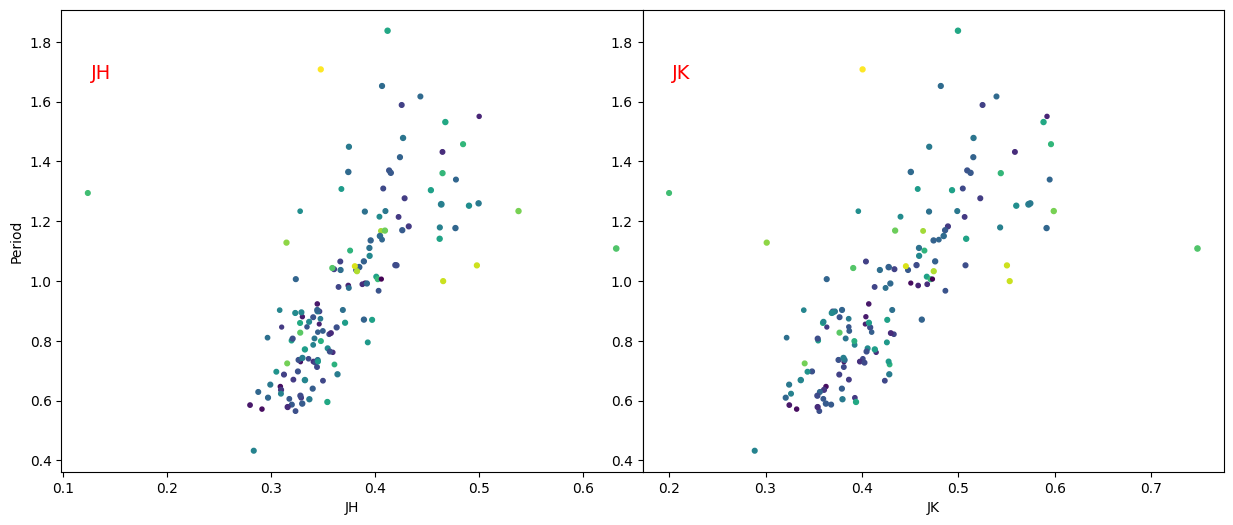

In [ ]:
from lvtlaw.b_data_transform import color_period

result_gaia_irsb_143 = [138, 137, 136, 71, 128, 127, 69, 67, 131, 80, 135, 113]
outliers = result_gaia_irsb_143

del_del_gaia = [33,63, 85, 18, 98, 107]
del_del_IRSB = [47, 58, 82, 56, 60]
result_99 = [101,116, 129, 130, 120]
# from 136 Cepheid (overtone filtered)
bv = [127, 128, 136, 137, 138]
bi = [129, 130, 135]
vi = [71, 109, 122, 131, 140]
vk = [67]
ij = [108]
ik = [44, 65, 67, 129, 136, 141]
jk = [62]
outliers =  list(set(bv+bi+bj+vi+vk+ij+ik+jk))#+del_del_gaia+del_del_IRSB+result_99))


color = color_period(data, ann= True, outliers = [], s=0)
#out = data.loc[outliers].sort_values(by = ['logP'],ascending=True)
#print(out.name)


In [3]:
color.to_csv(f'data/input/{len(color)}_color.csv')

In [3]:
j = data.drop(index = outliers).reset_index()
#print(len(j))
#j = j.loc[0:60]
j = j.sort_values(by = ['logP'],ascending=True).drop('index', axis=1)
j.to_csv(f'data/input/{len(j)}_Cepheids.csv')
print(f'data/input/{len(j)}_Cepheids.csv')
j.style
#color_period(j, ann= True, outliers = [], s=0)

data/input/123_Cepheids.csv


,Unnamed: 0.1,Unnamed: 0,Identifier,logP,B_mag,V_mag,I_mag,K_mag,EBV,J_mag,H_mag,DR3Name,RAdeg,DEdeg,Plx,RUWE,Gmag,BP-RP,BP-G,G-RP,RV,[Fe/H],E(BP-RP),RA_ICRS,DE_ICRS,plxDR3,mMplx,Period,name_1,mM0,Quality,FeH,mMplx_1a,name,MODE
0,0,49,SSSct,0.564814,9.165000,8.218000,7.095000,5.845000,0.325000,6.381000,5.937000,Gaia DR3 4251917636212432384,280.931305,-7.731094,0.898500,0.843000,7.893511,1.279434,0.559335,0.720099,-9.790000,-0.280200,0.524100,280.931305,-7.731094,0.929497,10.158759,3.671250,SS Sct,10.386000,4.000000,0.039000,10.232410,SSSct,FU
1,1,7,RTAur,0.571489,6.036000,5.443000,4.767000,3.937000,0.059000,4.302000,3.989000,Gaia DR3 3435571660360952704,97.142032,30.492976,1.815300,6.435000,5.336251,0.827747,0.300702,0.527045,5.420000,-1.059500,0.005700,97.142032,30.492976,1.837624,8.678717,3.728112,RT Aur,8.248000,3.000000,0.062000,8.705258,RTAur,FU
2,2,118,ADGem,0.578408,10.547000,9.855000,9.039000,8.077000,0.173000,8.527000,8.147000,Gaia DR3 3378049163365268608,100.781296,20.939106,0.335600,0.969000,9.709130,0.985612,0.415513,0.570099,51.550000,-0.166700,0.158900,100.781296,20.939106,0.371076,12.152685,3.787983,ADGem,12.448000,3.000000,-0.186000,12.370890,ADGem,FU
3,3,27,SUCyg,0.584952,7.455000,6.886000,6.196000,5.324000,0.098000,5.703000,5.387000,Gaia DR3 2031776202613700480,296.203059,29.264679,1.027500,3.443000,6.798264,0.888869,0.377103,0.511766,-9.000000,-0.640000,0.226300,296.203059,29.264679,1.060829,9.871773,3.845493,SU Cyg,9.209000,4.000000,-0.068000,9.941091,SUCyg,FU
4,4,101,YAur,0.586529,10.512000,9.614000,8.571000,7.167000,0.375000,7.743000,7.284000,Gaia DR3 195373217573454464,82.163495,42.437726,0.506100,1.122000,9.457623,1.320739,0.577438,0.743300,15.600000,nan,nan,82.163495,42.437726,0.537175,11.349421,3.859482,Y Aur,11.614000,3.000000,-0.044000,11.478818,YAur,FU
5,5,128,CSOri,0.589855,12.270000,11.371000,9.923000,8.850000,0.383000,9.425000,8.953000,Gaia DR3 3330259852538068608,91.856108,11.151976,0.230500,1.331000,11.259904,1.407073,0.608861,0.798212,54.560000,-0.478800,0.858600,91.856108,11.151976,0.262825,12.901669,3.889153,CS Ori,13.637000,4.000000,nan,13.186645,CSOri,FU
6,6,54,STTau,0.605768,9.066000,8.219000,7.138000,5.788000,0.368000,6.352000,5.898000,Gaia DR3 3346584610911570176,86.263169,13.576352,0.881200,1.351000,8.051365,1.297464,0.557817,0.739648,1.460000,-0.346600,0.663700,86.263169,13.576352,0.900079,10.228597,4.034298,ST Tau,10.173000,3.000000,-0.061000,10.274628,STTau,FU
7,7,34,BFOph,0.609329,8.200000,7.337000,6.366000,5.178000,0.235000,5.701000,5.285000,Gaia DR3 4111834567779557376,256.522910,-26.580565,1.153800,0.837000,7.069333,1.167566,0.506621,0.660945,-27.150000,-0.511500,0.473600,256.522910,-26.580565,1.184993,9.631422,4.067513,BF Oph,9.284000,2.000000,0.027000,9.689347,BFOph,FU
8,8,110,SYCas,0.609712,10.850000,9.873000,8.752000,7.343000,0.442000,7.909000,7.448000,Gaia DR3 422923956470923008,3.790869,58.424280,0.401800,1.039000,9.639541,1.344128,0.587946,0.756182,nan,-0.276800,0.825500,3.790869,58.424280,0.424766,11.859253,4.071102,SY Cas,11.511000,3.000000,-0.024000,11.979950,SYCas,FU
9,9,104,XSct,0.623050,11.138000,10.011000,8.620000,6.826000,0.589000,7.479000,6.951000,Gaia DR3 4104857784196182400,277.832283,-13.108185,0.596000,0.799000,9.592002,1.663447,0.799961,0.863486,15.510000,nan,nan,277.832283,-13.108185,0.637637,10.977132,4.198073,X Sct,12.019000,3.000000,nan,11.123769,XSct,FU


# Wesenheit deviation

{'B': 4.1789000000000005, 'V': 3.19, 'I': 1.93952, 'J': 0.9471109999999999, 'H': 0.575795, 'K': 0.392689}
./docs/reports/plots/1_datacleaning/110_IRSB_plx_SB.pdf


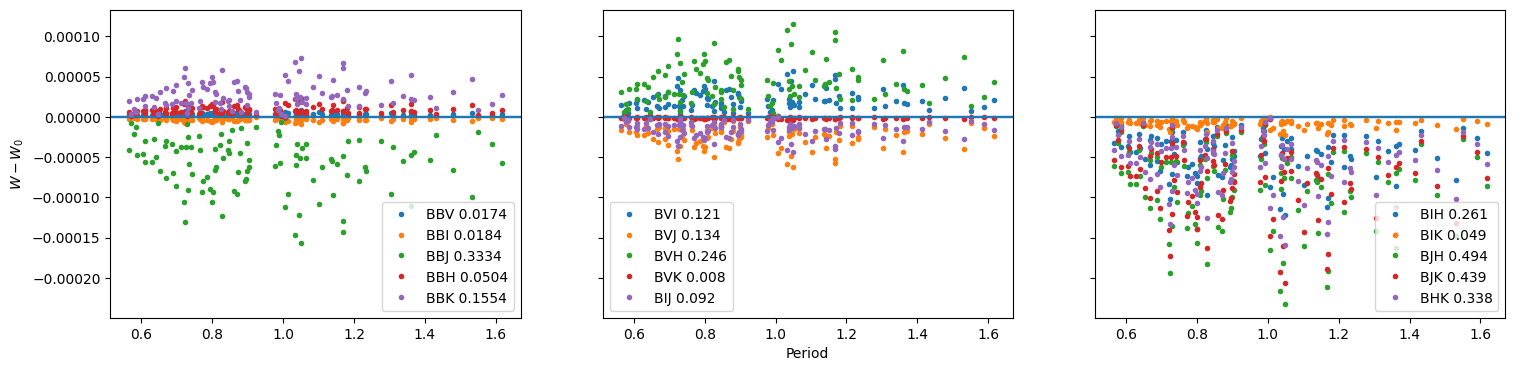

./docs/reports/plots/1_datacleaning/110_IRSB_plx_SV.pdf


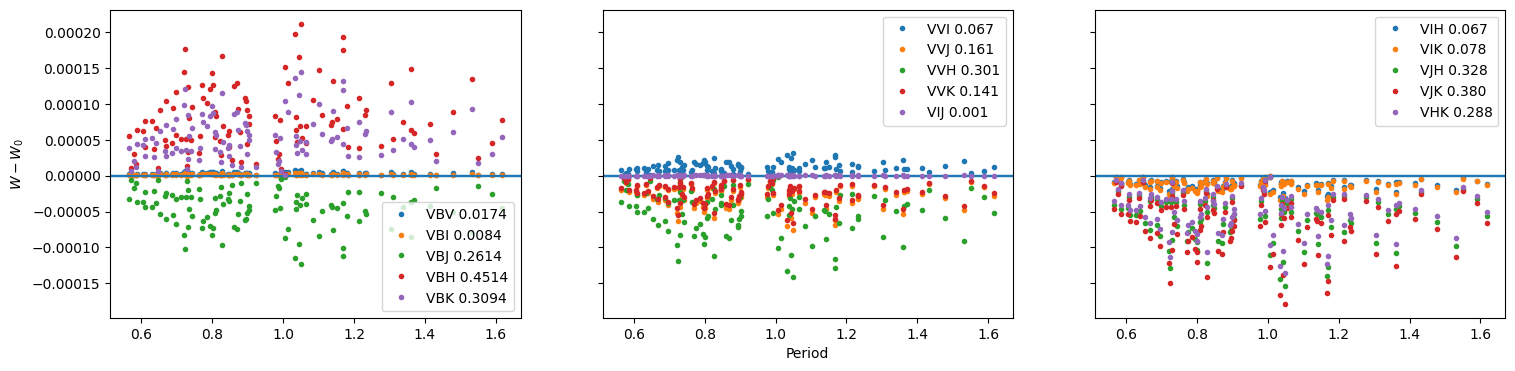

./docs/reports/plots/1_datacleaning/110_IRSB_plx_SI.pdf


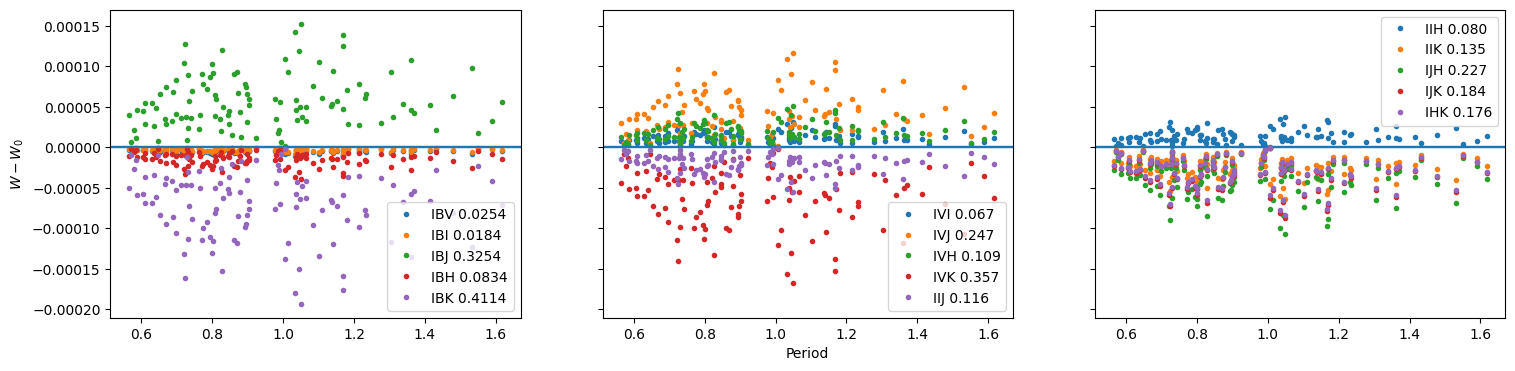

./docs/reports/plots/1_datacleaning/110_IRSB_plx_SJ.pdf


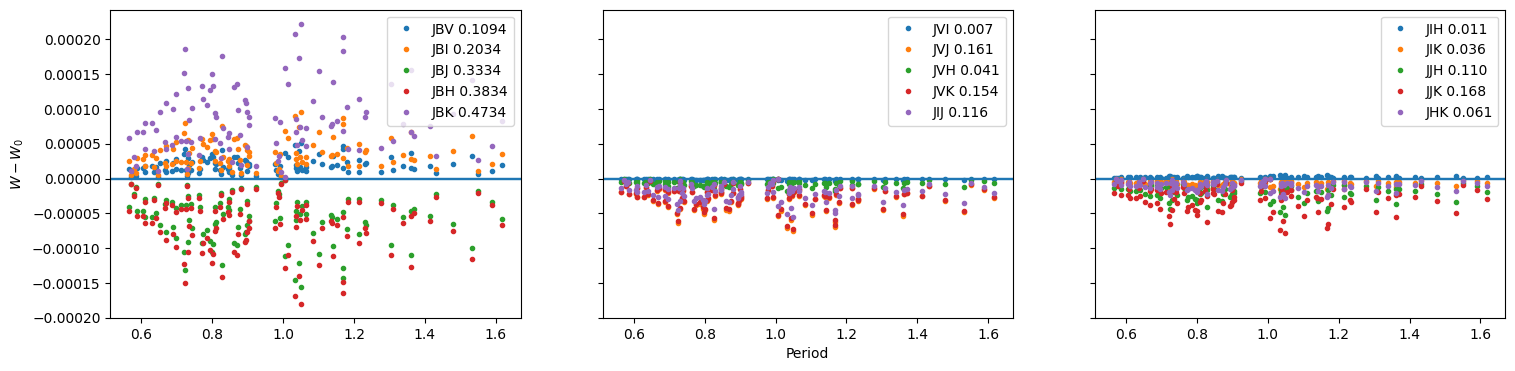

./docs/reports/plots/1_datacleaning/110_IRSB_plx_SH.pdf


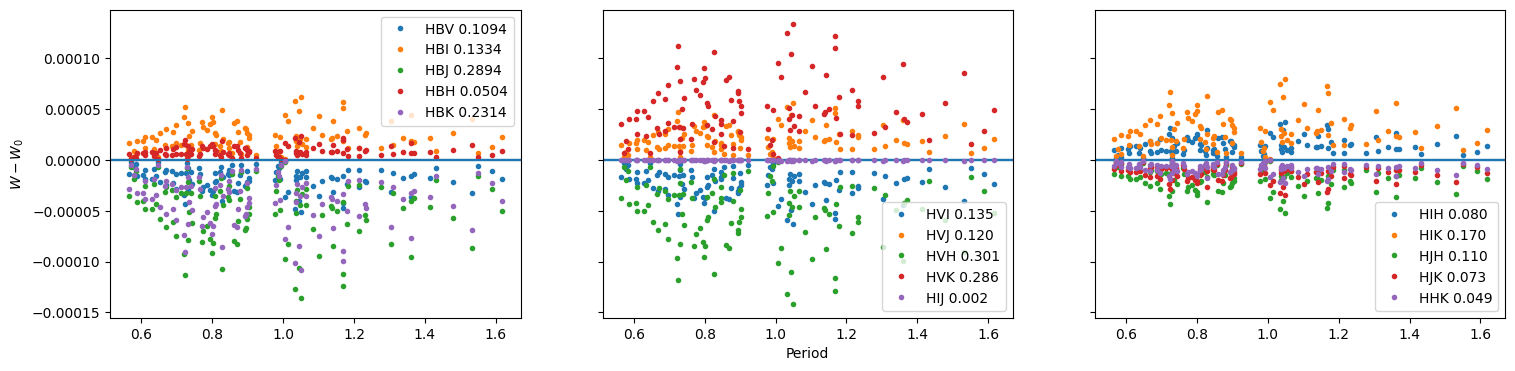

./docs/reports/plots/1_datacleaning/110_IRSB_plx_SK.pdf


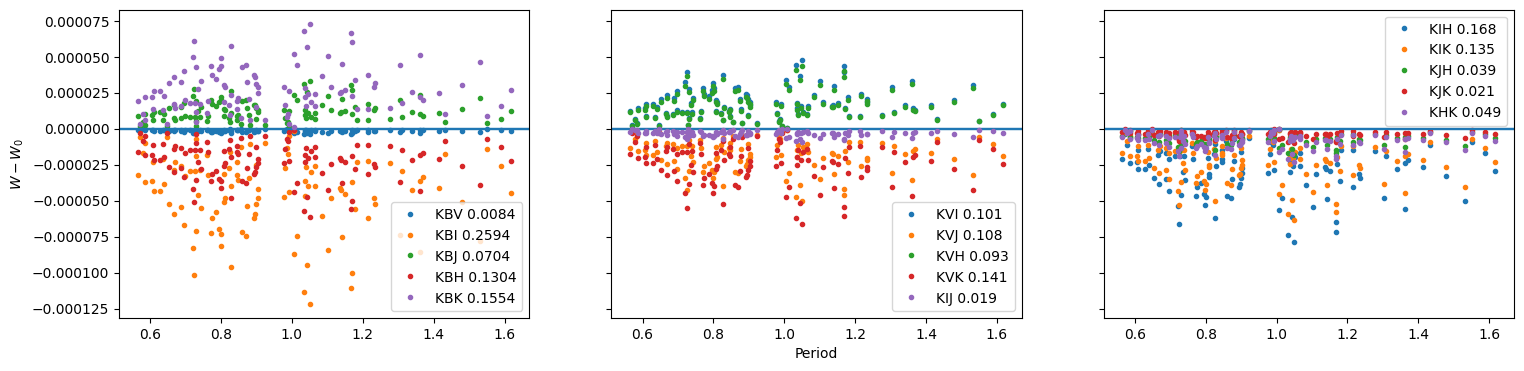

In [4]:
#PLW_mc, residue, prediction, merged_data = PLWcorrection(merged_data, plots=0) # c_pl_pw
#residue
from lvtlaw.b_data_transform import reddening_free, pltwes_deviation
from data.datamapping import *
import pandas as pd

F = {'B': 1.31, 'V': 1.0, 'R': 0.845,'I': 0.608,'J': 0.292,'H': 0.181,'K': 0.119 }  
S = {'B': 1.31, 'V': 1.0, 'R': 0.845,'I': 0.608,'J': 0.2969,'H': 0.1805,'K': 0.1231 }   			 
A=S
Rv = 3.19
R, R_v, _ = R_ratio(Rv, mag, A) 
print(R)
data = pd.read_csv(f'data/input/{file_name}.csv')
wesenheit = reddening_free(data, R, mag)

for m in mag: pltwes_deviation(m,wesenheit,file_name+'_S', dis_flag[0], s=1)

{'B': 4.2313, 'V': 3.23, 'I': 1.96384, 'J': 0.9431599999999999, 'H': 0.58463, 'K': 0.38437}
{'B': 4.1789000000000005, 'V': 3.19, 'I': 1.93952, 'J': 0.9471109999999999, 'H': 0.575795, 'K': 0.392689}
./docs/reports/plots/1_datacleaning/Extinction_compare.pdf


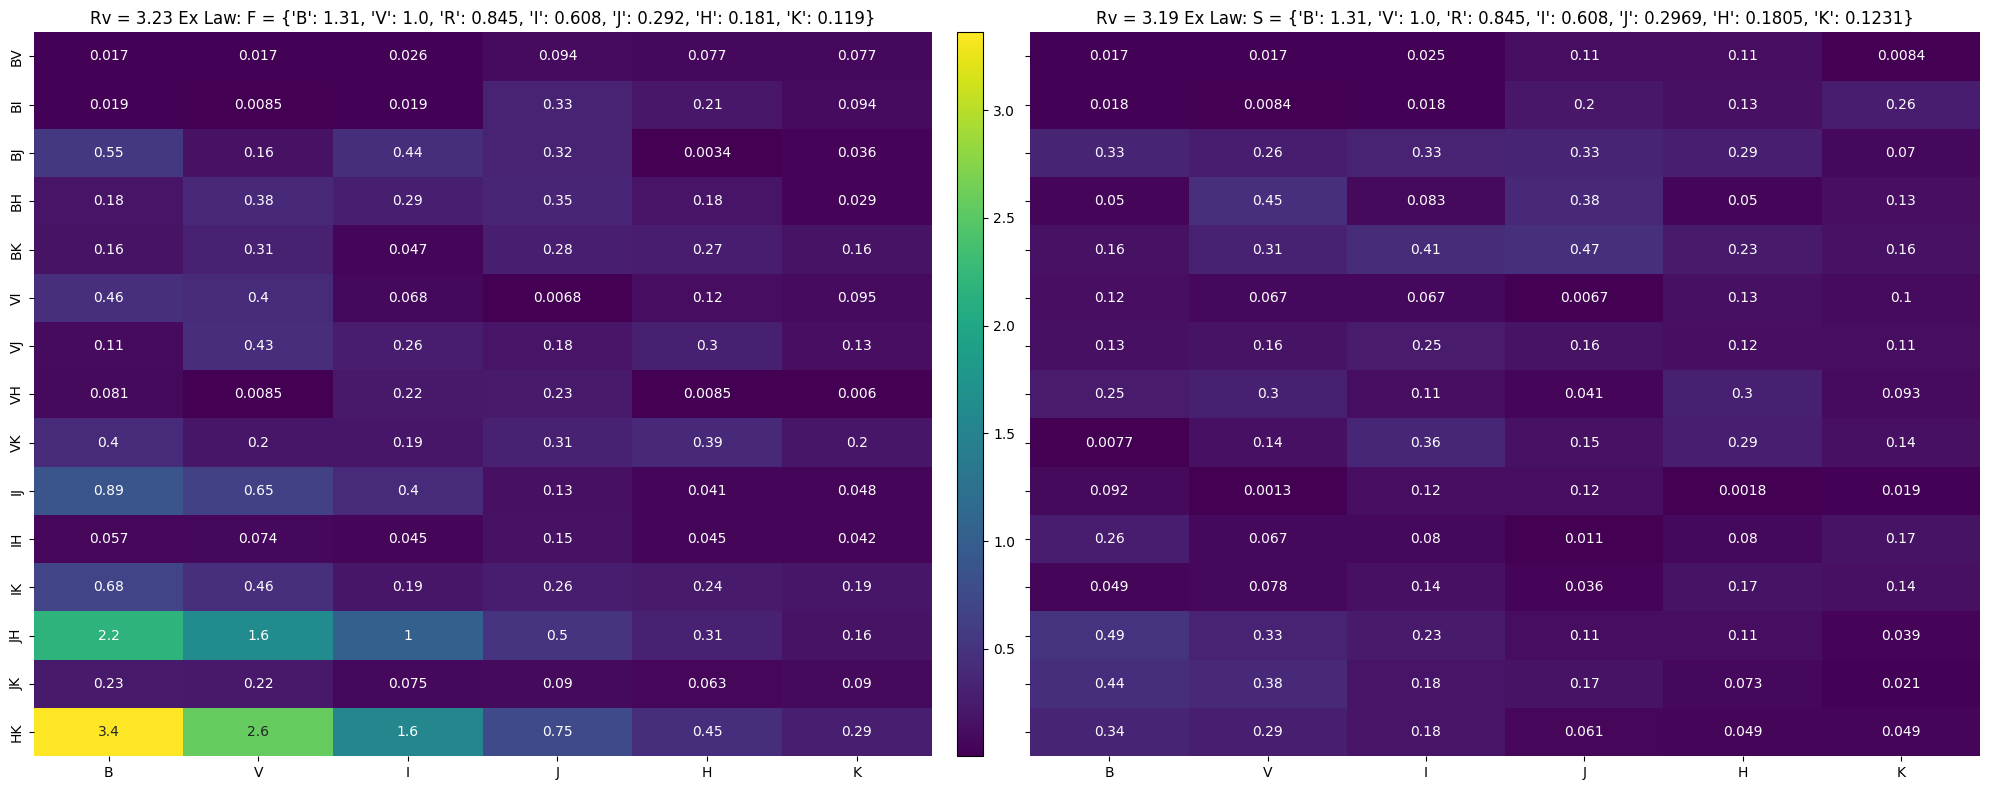

In [5]:
#gold = jesper
#j[['name', 'logP', 'IRSB', 'EBV', 'B_mag', 'V_mag', 'I_mag', 'J_mag', 'H_mag', 'K_mag', 'Wvi','Wjk']]
from lvtlaw.main_modules import * 
import matplotlib.pyplot as plt
from lvtlaw.a_utils import imgsave 
from data.datamapping import R_ratio, file_name, wes_show, R_v, A
from lvtlaw.b_data_transform import pltwes_deviation, extinction_law_compare

#A = {'B': 1.31, 'V': 1.0, 'R': 0.845,'I': 0.6091,'J': 0.2968,'H': 0.1817,'K': 0.1232 }   			 
F = {'B': 1.31, 'V': 1.0, 'R': 0.845,'I': 0.608,'J': 0.292,'H': 0.181,'K': 0.119 }   
S = {'B': 1.31, 'V': 1.0, 'R': 0.845,'I': 0.608,'J': 0.2969,'H': 0.1805,'K': 0.1231 }   			 
data = pd.read_csv(f'data/input/{file_name}.csv')
p1 = (3.23, F, 'F')
p2 = (3.19, S, 'S')
plist = [p1, p2]
extinction_law_compare(data, plist, precision=4, s=1)

K 0.123 {'B': 4.1789000000000005, 'V': 3.19, 'I': 1.93952, 'J': 0.9471109999999999, 'H': 0.575795, 'K': 0.39237}


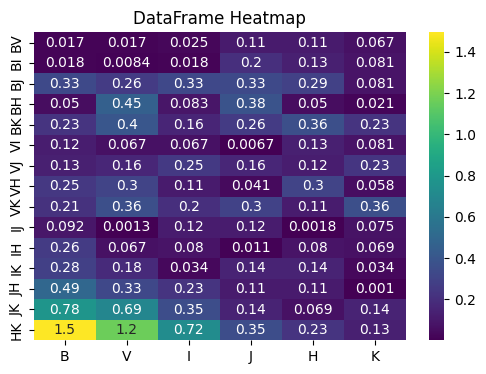

K 0.1231 {'B': 4.1789000000000005, 'V': 3.19, 'I': 1.93952, 'J': 0.9471109999999999, 'H': 0.575795, 'K': 0.392689}


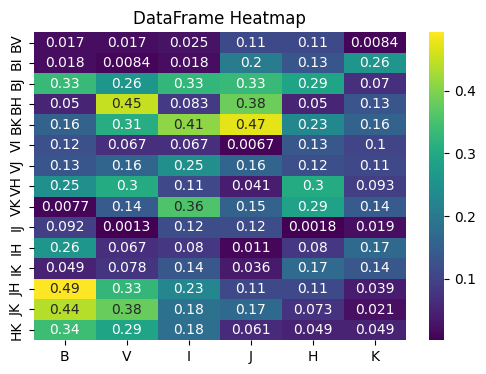

K 0.1232 {'B': 4.1789000000000005, 'V': 3.19, 'I': 1.93952, 'J': 0.9471109999999999, 'H': 0.575795, 'K': 0.393008}


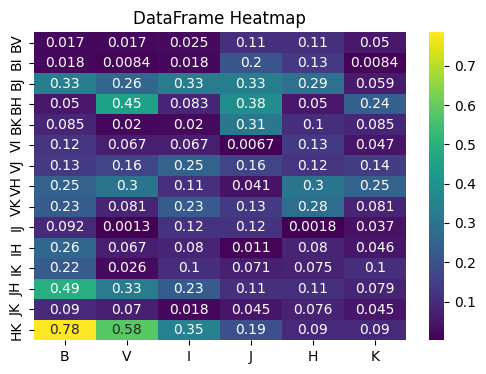

K 0.12329999999999999 {'B': 4.1789000000000005, 'V': 3.19, 'I': 1.93952, 'J': 0.9471109999999999, 'H': 0.575795, 'K': 0.393327}


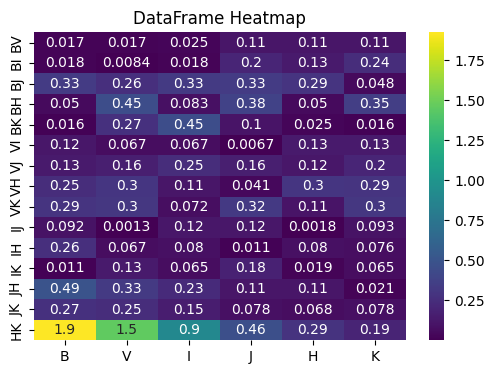

K 0.1234 {'B': 4.1789000000000005, 'V': 3.19, 'I': 1.93952, 'J': 0.9471109999999999, 'H': 0.575795, 'K': 0.393646}


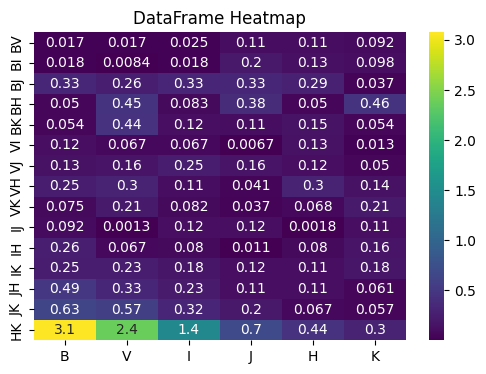

K 0.1235 {'B': 4.1789000000000005, 'V': 3.19, 'I': 1.93952, 'J': 0.9471109999999999, 'H': 0.575795, 'K': 0.393965}


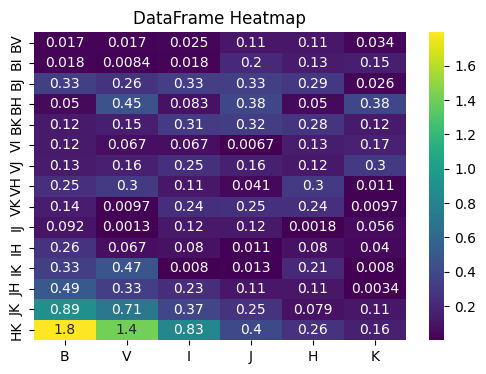

K 0.1236 {'B': 4.1789000000000005, 'V': 3.19, 'I': 1.93952, 'J': 0.9471109999999999, 'H': 0.575795, 'K': 0.394284}


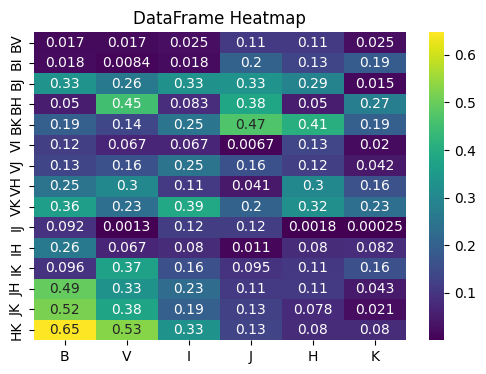

K 0.1237 {'B': 4.1789000000000005, 'V': 3.19, 'I': 1.93952, 'J': 0.9471109999999999, 'H': 0.575795, 'K': 0.394603}


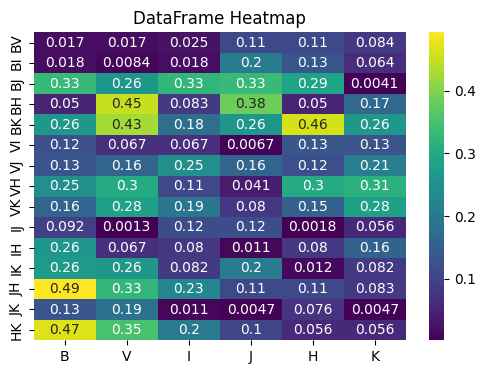

K 0.1238 {'B': 4.1789000000000005, 'V': 3.19, 'I': 1.93952, 'J': 0.9471109999999999, 'H': 0.575795, 'K': 0.394922}


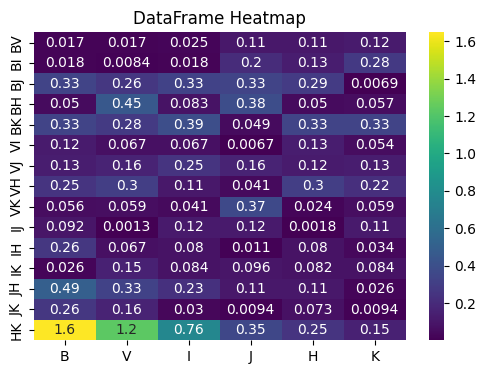

K 0.1239 {'B': 4.1789000000000005, 'V': 3.19, 'I': 1.93952, 'J': 0.9471109999999999, 'H': 0.575795, 'K': 0.395241}


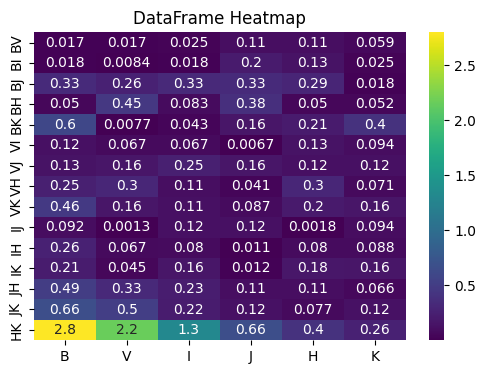

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
from lvtlaw.b_data_transform import wes_deviation, reddening_free
from data.datamapping import *

#A = {'B': 1.31, 'V': 1.0, 'R': 0.845,'I': 0.6082,'J': 0.2998,'H': 0.1816,'K': 0.1267 }   			 
ex = {'B': 1.31, 'V': 1.0, 'R': 0.845,'I': 0.608,'J': 0.2969,'H': 0.1805,'K': 0.1231 }   		
#ex = {'B': 1.31, 'V': 1.0, 'R': 0.845,'I': 0.6082,'J': 0.2969,'H': 0.181,'K': 0.1231 }	 
#ex = {'B': 1.31, 'V': 1.0, 'R': 0.845,'I': 0.6088,'J': 0.2963,'H': 0.1823,'K': 0.1267 }  ; 
Rv = 3.19
def extin(ex, z, x,n, Rv):
    for i in range(0,10):
        ex[z] = x + i/10**n
        R, R_v, _ = R_ratio(Rv, mag=mag, A=ex) 
        print(z, ex[z], R)
        wesenheit = reddening_free(data, R, mag, dis_flag=dis_flag, dis_list=dis_list)
        c = pd.DataFrame(); 
        for m in mag: c[m] = wes_deviation(m,wesenheit,4, f'{file_name}_S', dis_flag[0], s=0)
        plt.figure(figsize=(6,4))
        sns.heatmap(c, annot=True, cmap="viridis")
        plt.title("DataFrame Heatmap")
        plt.show()

extin(ex, 'K', 0.123,4, Rv)

In [5]:
wesenheit.head().style

,name,logP,EBV,IRSB,VVI_s,VVI_s0,IVI_s,IVI_s0,JVI_s,JVI_s0,KVI_s,KVI_s0,VVJ_s,VVJ_s0,IVJ_s,IVJ_s0,JVJ_s,JVJ_s0,KVJ_s,KVJ_s0,VVK_s,VVK_s0,IVK_s,IVK_s0,JVK_s,JVK_s0,KVK_s,KVK_s0,VIJ_s,VIJ_s0,IIJ_s,IIJ_s0,JIJ_s,JIJ_s0,KIJ_s,KIJ_s0,VIK_s,VIK_s0,IIK_s,IIK_s0,JIK_s,JIK_s0,KIK_s,KIK_s0,VJK_s,VJK_s0,IJK_s,IJK_s0,JJK_s,JJK_s0,KJK_s,KJK_s0
0,HV1328,1.199692,0.016000,18.395000,11.718907,11.718903,11.718907,11.718903,12.048493,12.048497,12.086093,12.086097,12.252080,12.252057,12.091360,12.091359,12.250920,12.250922,12.193480,12.193465,12.178250,12.178250,12.040375,12.040375,12.223375,12.223375,12.178250,12.178250,12.751003,12.750977,12.441346,12.441327,12.440907,12.440901,12.292625,12.292625,12.454000,12.454000,12.233400,12.233400,12.328160,12.328160,12.233400,12.233400,11.925800,11.925832,11.863660,11.863683,12.127365,12.127379,12.127760,12.127766
1,HV1333,1.212084,0.024000,19.255000,11.878947,11.878941,11.878947,11.878941,12.187453,12.187459,12.210053,12.210059,12.378452,12.378418,12.227659,12.227658,12.377023,12.377027,12.310862,12.310840,12.293250,12.293250,12.168875,12.168875,12.345275,12.345275,12.293250,12.293250,12.845676,12.845637,12.555632,12.555603,12.555044,12.555034,12.403500,12.403500,12.542000,12.542000,12.343000,12.343000,12.439800,12.439800,12.343000,12.343000,12.002080,12.002129,11.965056,11.965090,12.234534,12.234555,12.235016,12.235026
2,HV1335,1.157800,0.024000,18.624000,12.101266,12.101260,12.101266,12.101260,12.416934,12.416940,12.428734,12.428740,12.612204,12.612170,12.458043,12.458042,12.610871,12.610875,12.531774,12.531752,12.511000,12.511000,12.388000,12.388000,12.573000,12.573000,12.511000,12.511000,13.090195,13.090156,12.793490,12.793461,12.792955,12.792945,12.626625,12.626625,12.757000,12.757000,12.560200,12.560200,12.666480,12.666480,12.560200,12.560200,12.164480,12.164529,12.145436,12.145470,12.441229,12.441250,12.441696,12.441706
3,HV1345,1.129670,0.031000,18.731000,12.230585,12.230577,12.230585,12.230577,12.480415,12.480423,12.443415,12.443423,12.635280,12.635236,12.513010,12.513008,12.633970,12.633975,12.525180,12.525152,12.497000,12.497000,12.417000,12.417000,12.582000,12.582000,12.497000,12.497000,13.013735,13.013685,12.778770,12.778732,12.778215,12.778202,12.600125,12.600125,12.657000,12.657000,12.529000,12.529000,12.642800,12.642800,12.529000,12.529000,12.022600,12.022663,12.084920,12.084964,12.401630,12.401657,12.402120,12.402133
4,HV822,1.223807,0.039000,19.078000,11.640621,11.640611,11.640621,11.640611,12.013579,12.013589,12.020379,12.020389,12.244080,12.244025,12.062110,12.062108,12.242670,12.242676,12.141980,12.141944,12.115750,12.115750,11.973125,11.973125,12.194525,12.194525,12.115750,12.115750,12.808719,12.808656,12.458258,12.458211,12.457711,12.457695,12.254125,12.254125,12.401000,12.401000,12.172800,12.172800,12.302920,12.302920,12.172800,12.172800,11.675840,11.675919,11.665188,11.665243,12.027257,12.027291,12.027768,12.027784


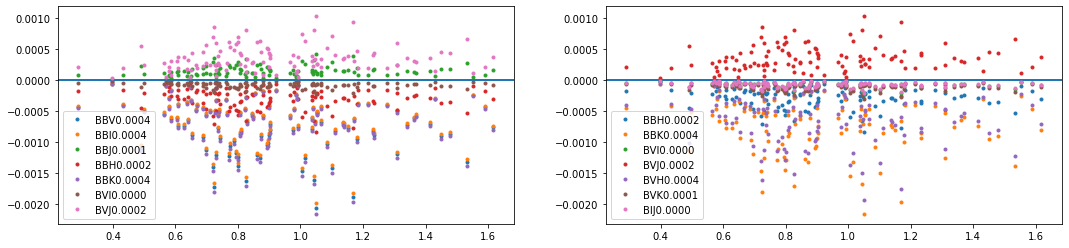

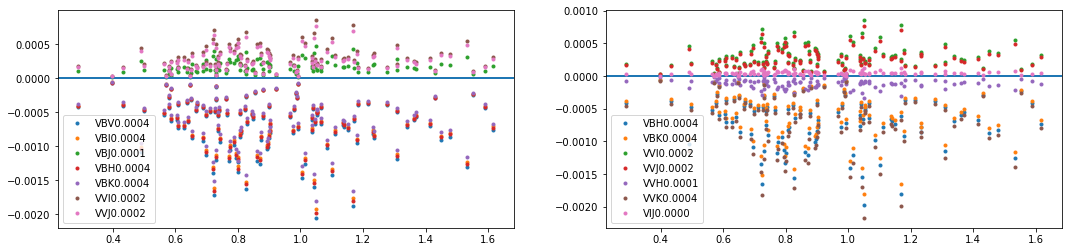

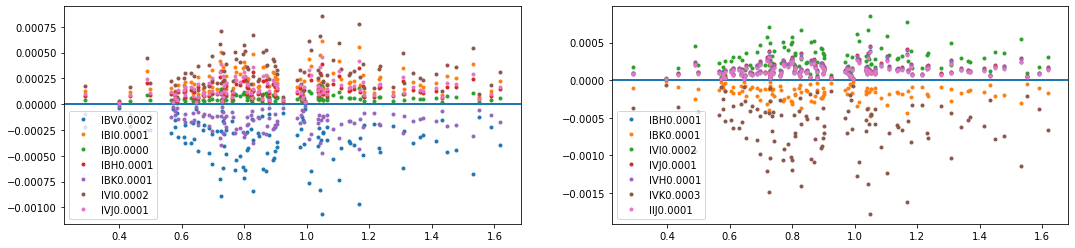

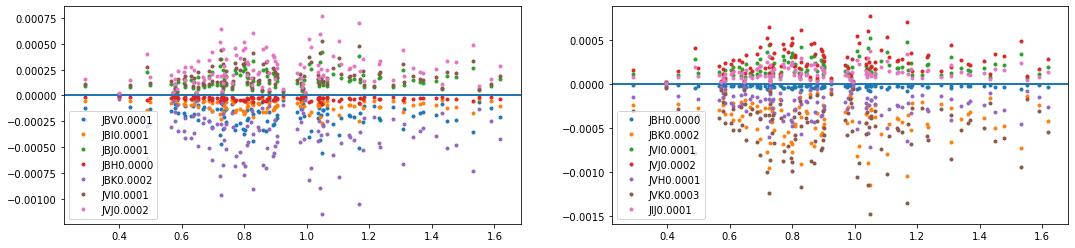

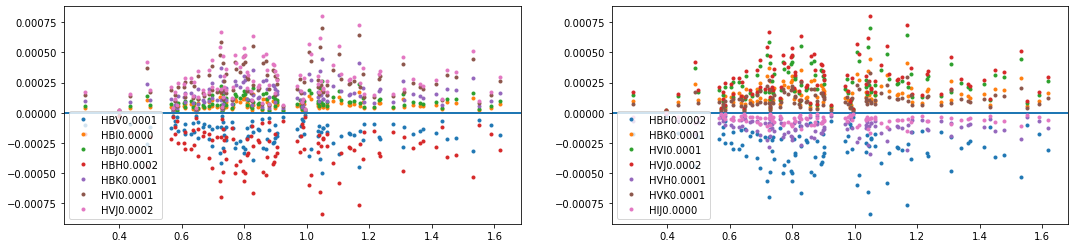

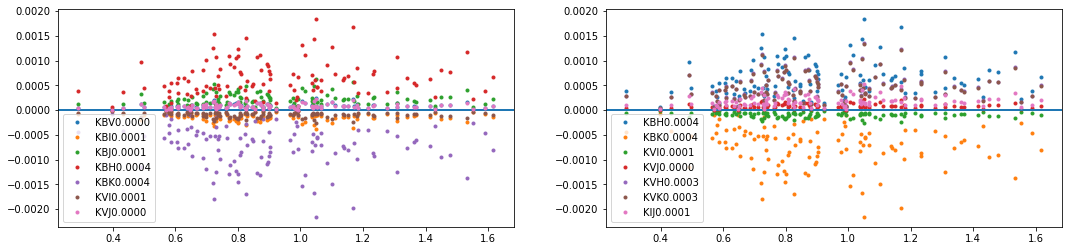

In [48]:
#PLW_mc, residue, prediction, merged_data = PLWcorrection(merged_data, plots=0) # c_pl_pw
#residue
def pltwes_magwise(m, wesenheit):
    fig_res, axs_res = plt.subplots(1, 2, figsize=(18, 4))
    axs_res = axs_res.flatten()
    for col in range(7):
        dev = wesenheit[f'{m}{wes_show[col]}_j']-wesenheit[f'{m}{wes_show[col]}_j0']
        axs_res[0].axhline(0)#, color='red', linestyle='--', linewidth=1)
        axs_res[0].plot(wesenheit.logP, dev, '.', label =m+wes_show[col] + f'{dev.std():.4f}')
        dev = wesenheit[f'{m}{wes_show[col+3]}_j']-wesenheit[f'{m}{wes_show[col+3]}_j0']
        axs_res[1].axhline(0)#, color='red', linestyle='--', linewidth=1)
        axs_res[1].plot(wesenheit.logP, dev, '.', label =m+wes_show[col+3] + f'{dev.std():.4f}')
        #dev = wesenheit[f'{m}{wes_show[col+10]}_j']-wesenheit[f'{m}{wes_show[col+10]}_j0']
        #axs_res[2].axhline(0)#, color='red', linestyle='--', linewidth=1)
        #axs_res[2].plot(wesenheit.logP, dev, '.', label =m+wes_show[col+10])
    axs_res[1].legend()
    axs_res[0].legend() 
    #axs_res[2].legend()
    #imgsave(m)
    plt.show()

for m in mag: pltwes_magwise(m, wesenheit)

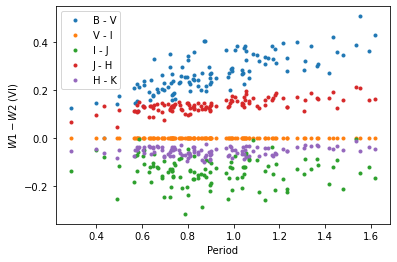

In [45]:
import matplotlib.pyplot as plt
col = 'VI'
wes=wesenheit[[f'{m}{col}{dis_flag[0]}' for m in mag]+['logP']]
de=[]
for m in range(len(mag)-1):
    x = wes[f'{mag[m]}{col}{dis_flag[0]}']-wes[f'{mag[m+1]}{col}{dis_flag[0]}']
    plt.plot(wes['logP'], x, '.', label= f'{mag[m]} - {mag[m+1]}')
    de.append(x)
plt.legend()
plt.ylabel(f'$W1 - W2$ ({col})')
plt.xlabel('Period')
plt.show()



PL for 129_IRSB_plx_p calibrated with JK
B(0.131) = -1.887(0.040) (logP - 1) -3.112(0.012)
V(0.089) = -2.359(0.027) (logP - 1) -3.902(0.008)
I(0.163) = -2.705(0.050) (logP - 1) -4.684(0.014)
J(0.188) = -2.929(0.057) (logP - 1) -5.173(0.017)
H(0.188) = -3.060(0.057) (logP - 1) -5.546(0.017)
K(0.187) = -3.112(0.057) (logP - 1) -5.604(0.017)
PL for 129_IRSB_plx_j calibrated with JK
B(0.140) = -1.950(0.043) (logP - 1) -3.168(0.012)
V(0.061) = -2.423(0.019) (logP - 1) -3.958(0.005)
I(0.149) = -2.769(0.046) (logP - 1) -4.741(0.013)
J(0.182) = -2.994(0.056) (logP - 1) -5.230(0.016)
H(0.179) = -3.126(0.055) (logP - 1) -5.603(0.016)
K(0.180) = -3.178(0.055) (logP - 1) -5.661(0.016)


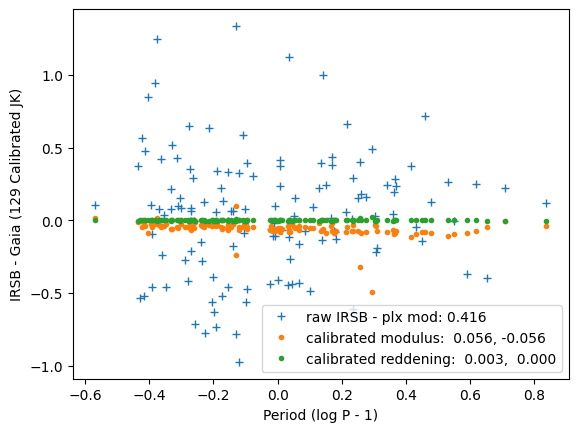

In [37]:
import pandas as pd
from lvtlaw.g_result import *
from lvtlaw.h_loadoutput import *
from data.datamapping import *
n=129
dis_flag = ['_p', '_j']
dis_list = ['IRSB', 'gplx']
file_name = f'{n}_IRSB_plx'
wes_show = ['JK']
data_out_p=f'./data/processed/{file_name}{dis_flag[0]}_{R_v}/'
result_p, r_reg_p, res_p, pre_p = calibrated_result_(data_out_p, n)
data_out_j=f'./data/processed/{file_name}{dis_flag[1]}_{R_v}/'
result_j, r_reg_j, res_j, pre_j = calibrated_result_(data_out_j, n)
for col in wes_show: 
    slp_p, intr_p = print_PL(r_reg_p, col, file_name, dis_flag[0])    
    slp_j, intr_j = print_PL(r_reg_j, col, file_name, dis_flag[1])
    d, g, i = plt_dev(col, dis_list,dis_flag, file_name)


In [65]:
filter = d[(d['mu']>0.05) | (d['mu']<-0.2)]
#filter = d[(d['mu']<-0.2)]
#filter = d[(d['mu']<0.2) & (d['mu']>-0.2)]
#filter.to_csv(f'./data/input/{len(filter)}_IRSB_plx.csv')
filter.name

8     CTCar
12    TZMon
22    CKSct
72    RUSct
Name: name, dtype: object

In [67]:

bv = [7,8,12,13] # [(d['mu']<-2)]
vh = [0,7,8,12,13] # [(d['mu']>0.3) | (d['mu']<-0.3)]
ij = [1,3,7,8,30] # [(d['mu']>0.1) | (d['mu']<-0.3)]
ik=[8,12,22,72,82] # [(d['mu']>0.05) | (d['mu']<-0.1)]
jk = [8,12,22,72]

out = list(set(bv+vh+ij+ik+jk))
out

[0, 1, 3, 7, 8, 72, 12, 13, 82, 22, 30]

From 150, these seven have (d['mu']>0.5) | (d['mu']<-0.5)
VI
1         DTCyg
3      V0465Mon
12        CSOri
66     V0336Aql
97        SVPer
99        HZPer
106       SUCru

From 136, overtone
VI
1      V0336Aql
4         HZPer
29     V0495Cyg
70        SVPer
72        SUCru
104    V1344Aql
107       RXCam

From 129, 
JK. [(dres[f'd_V0V{col}_p']>0.5) | (dres[f'd_V0V{col}_p']<-0.5)]
[0, 1, 3, 4, 5, 7, 8, 11, 12, 14, 18, 22, 23, 24, 28, 65, 67, 69, 72, 88, 95, 97, 103, 109, 110, 124]  = irsb + plx
1         CNSct
3         CYAur
11        AASer
18     V0916Aql
23        CPCep
24        VWCen
28        RZGem
65        SZCyg
67        KQSco
69        GYSge
72        RUSct
88         SVul
95        WZSgr
109       SVVul
110        UVul




In [39]:
d

,Unnamed: 0,gal,name,overtone,logP,B_mag,V_mag,I_mag,J_mag,H_mag,...,Mj_1,Mh_1,Mk_1,Wvi_1,Wjk_1,Radius_IRSB,Teq,Mass,mu,rd
0,0,MW,BEMon,0,0.432249,11.715,10.580,9.637,8.354,7.851,...,-3.644,-3.934,-3.930,NaN,-4.127,26.9,6203.0,3.7,0.012866,0.000054
1,2,MW,CNSct,0,0.999665,14.501,12.479,9.610,7.991,7.078,...,-4.577,-5.058,-5.125,NaN,-5.503,55.5,4782.0,3.3,-0.051583,-0.002025
2,3,MW,ZetaGem,0,1.006497,4.708,3.849,3.117,2.612,2.201,...,-5.163,-5.569,-5.636,NaN,-5.962,64.1,5451.0,4.5,-0.077594,0.002139
3,5,MW,CYAur,0,1.141376,13.446,11.867,9.962,8.708,7.961,...,-5.622,-6.094,-6.128,NaN,-6.475,83.7,5162.0,5.3,-0.060579,-0.000139
4,6,MW,YZAur,0,1.259902,11.716,10.349,8.951,7.605,6.906,...,-5.946,-6.453,-6.519,NaN,-6.912,102.6,4972.0,5.9,-0.084529,0.003499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,131,MW,xSgr,0,0.845893,5.311,4.561,3.655,3.016,2.618,...,-4.919,-5.232,-5.281,-5.462,-5.530,51.7,5882.0,4.5,-0.054731,0.001175
125,132,MW,dCeph,0,0.729678,4.612,3.959,3.209,2.748,2.392,...,-4.601,-4.929,-4.982,-5.231,-5.245,45.5,5802.0,4.8,-0.066166,0.001406
126,133,MW,etaAql,0,0.855930,4.689,3.904,3.018,2.460,2.066,...,-4.878,-5.225,-5.280,-5.571,-5.558,53.3,5620.0,4.7,-0.047682,0.000241
127,134,MW,betaDor,0,0.993131,4.545,3.743,2.947,2.438,2.029,...,-5.139,-5.529,-5.589,-5.818,-5.899,62.4,5498.0,4.4,-0.069921,0.001454


In [38]:
vi = [0,1, 5,8,11,14,18]
ik = [0,4,8,11,18,23,24,67,69]
jh = [1,4,11,18,23,24,65,69,72,88,95,103]
p=[0, 1, 3, 4, 7, 8, 11, 12, 18, 22, 23, 24, 28, 65, 67, 69, 72, 88, 95, 97, 109, 110, 124]
out = list(set(vi+ik+jh+p))
print(out)

[0, 1, 3, 4, 5, 7, 8, 11, 12, 14, 18, 22, 23, 24, 28, 65, 67, 69, 72, 88, 95, 97, 103, 109, 110, 124]


In [42]:
filter = d.drop(out)
filter.to_csv(f'./data/input/{len(filter)}_IRSB_plx.csv')
filter

,Unnamed: 0,gal,name,overtone,logP,B_mag,V_mag,I_mag,J_mag,H_mag,...,Mj_1,Mh_1,Mk_1,Wvi_1,Wjk_1,Radius_IRSB,Teq,Mass,mu,rd
2,3,MW,ZetaGem,0,1.006497,4.708,3.849,3.117,2.612,2.201,...,-5.163,-5.569,-5.636,NaN,-5.962,64.1,5451.0,4.5,-0.077594,0.002139
6,8,MW,WWMon,0,0.668580,13.637,12.510,11.137,10.064,9.507,...,-3.892,-4.232,-4.226,-4.378,-4.455,32.0,5839.0,2.7,0.001368,-0.001635
9,11,MW,CSVel,0,0.771201,13.049,11.709,10.068,8.840,8.234,...,-4.531,-4.872,-4.940,-5.152,-5.221,46.0,5567.0,4.3,-0.047780,0.000435
10,12,MW,CFCas,0,0.687994,12.338,11.128,9.691,8.701,8.132,...,-4.169,-4.539,-4.595,-4.886,-4.888,39.3,5563.0,3.9,-0.055445,0.000999
13,15,MW,V0508Mon,0,0.616329,11.057,10.500,9.459,8.717,8.275,...,-4.693,-5.025,-5.046,-5.277,-5.289,47.0,5788.0,7.1,-0.023366,0.000696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,130,MW,WSgr,0,0.880529,5.423,4.672,3.863,3.311,2.941,...,-3.946,-4.277,-4.349,-4.546,-4.627,34.5,5669.0,1.7,-0.067079,0.001460
125,132,MW,dCeph,0,0.729678,4.612,3.959,3.209,2.748,2.392,...,-4.601,-4.929,-4.982,-5.231,-5.245,45.5,5802.0,4.8,-0.066166,0.001406
126,133,MW,etaAql,0,0.855930,4.689,3.904,3.018,2.460,2.066,...,-4.878,-5.225,-5.280,-5.571,-5.558,53.3,5620.0,4.7,-0.047682,0.000241
127,134,MW,betaDor,0,0.993131,4.545,3.743,2.947,2.438,2.029,...,-5.139,-5.529,-5.589,-5.818,-5.899,62.4,5498.0,4.4,-0.069921,0.001454


In [35]:
col='VI'
print(col)
filter = dres[(dres[f'd_B0B{col}_j']>0.5) | (dres[f'd_B0B{col}_j']<-0.5)]
#filter = dres[(dres[f'd_B0B{col}_p']<-0.5)]
filter.name

VI


0        BEMon
1        CNSct
5        BMPer
8        CTCar
11       AASer
14       TWNor
18    V0916Aql
Name: name, dtype: object

VI


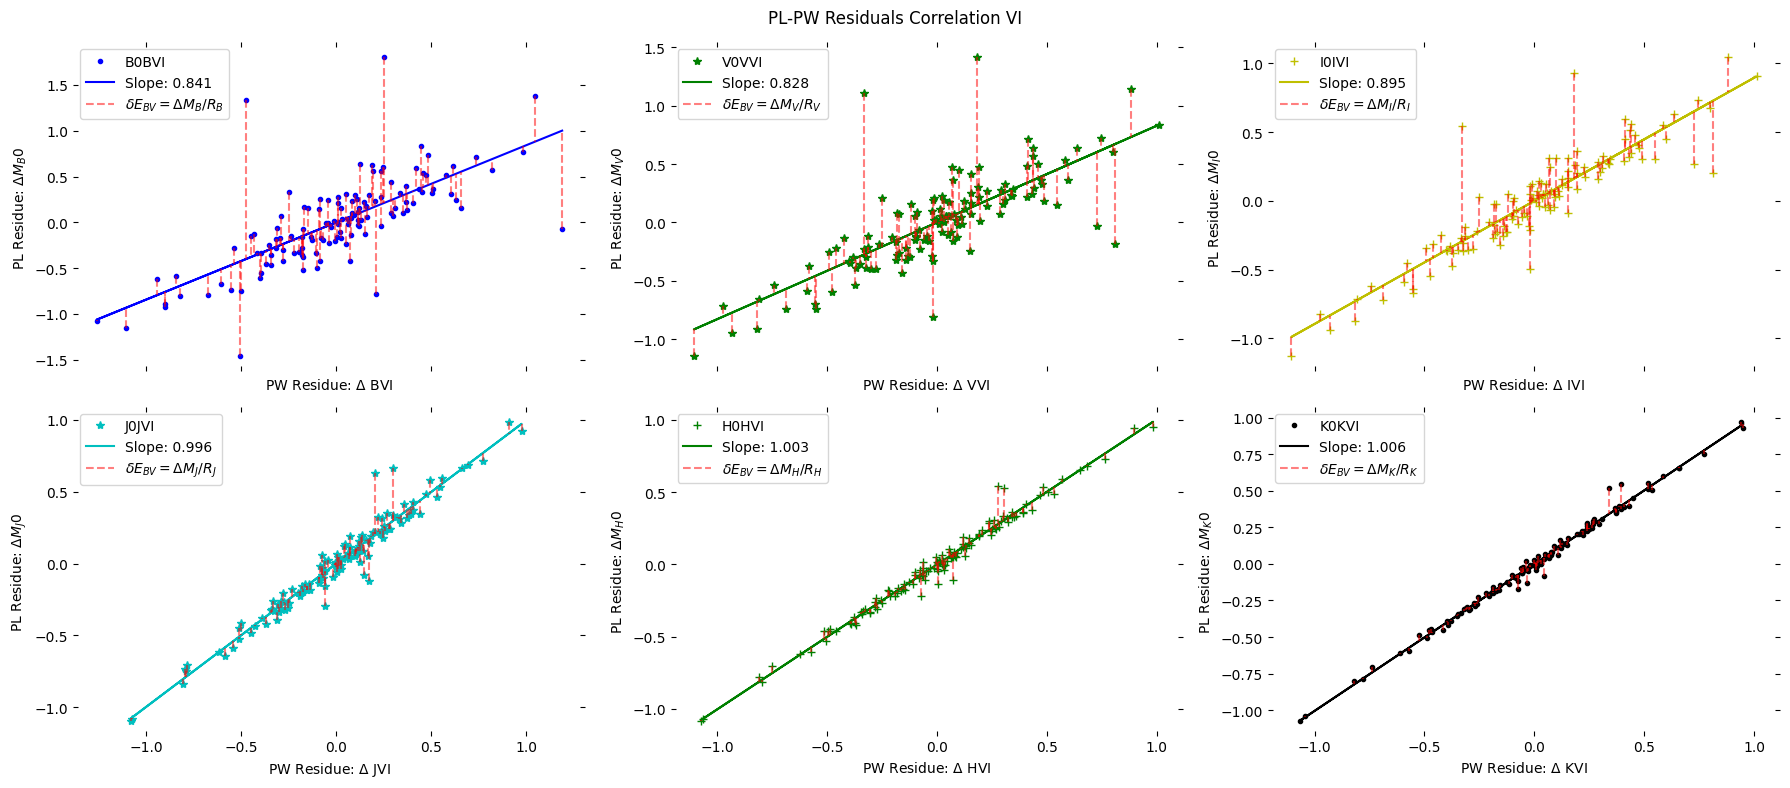

IK


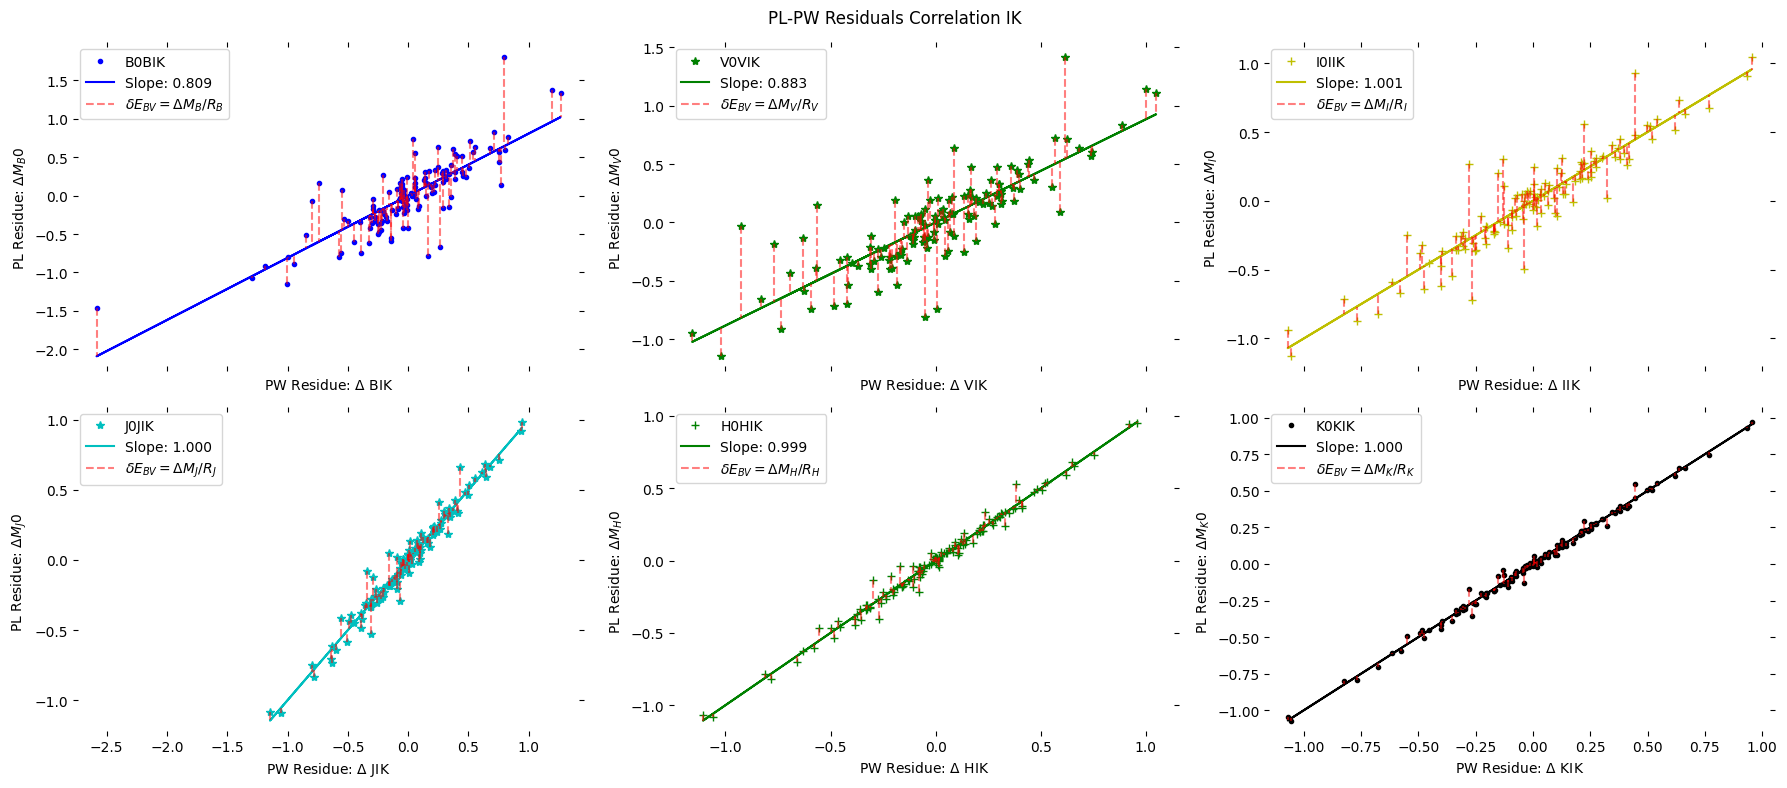

JH


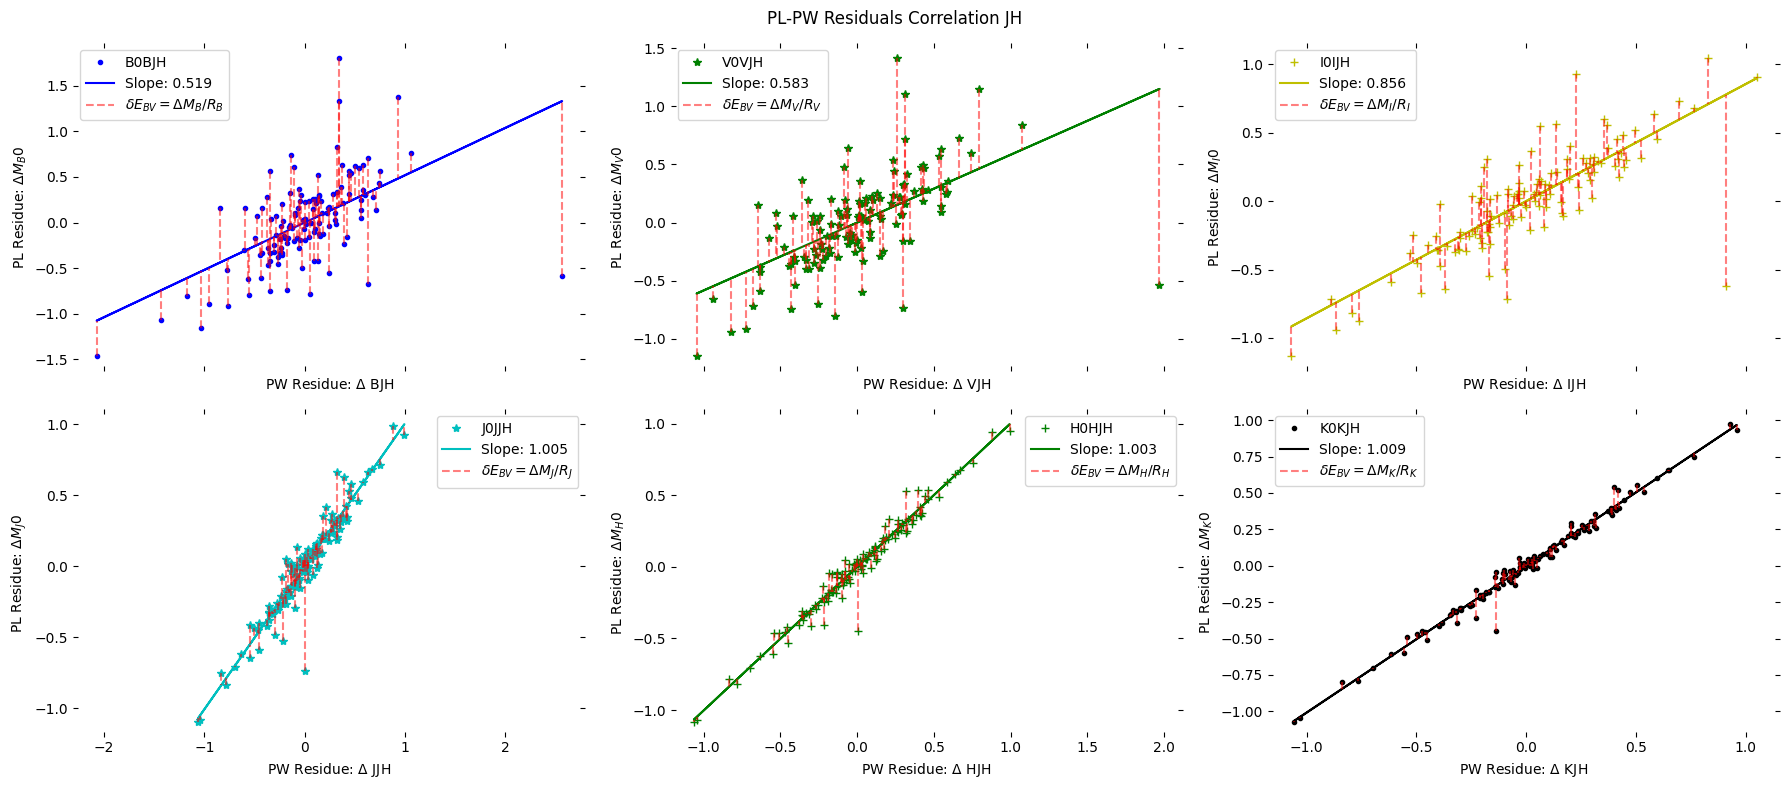

JK


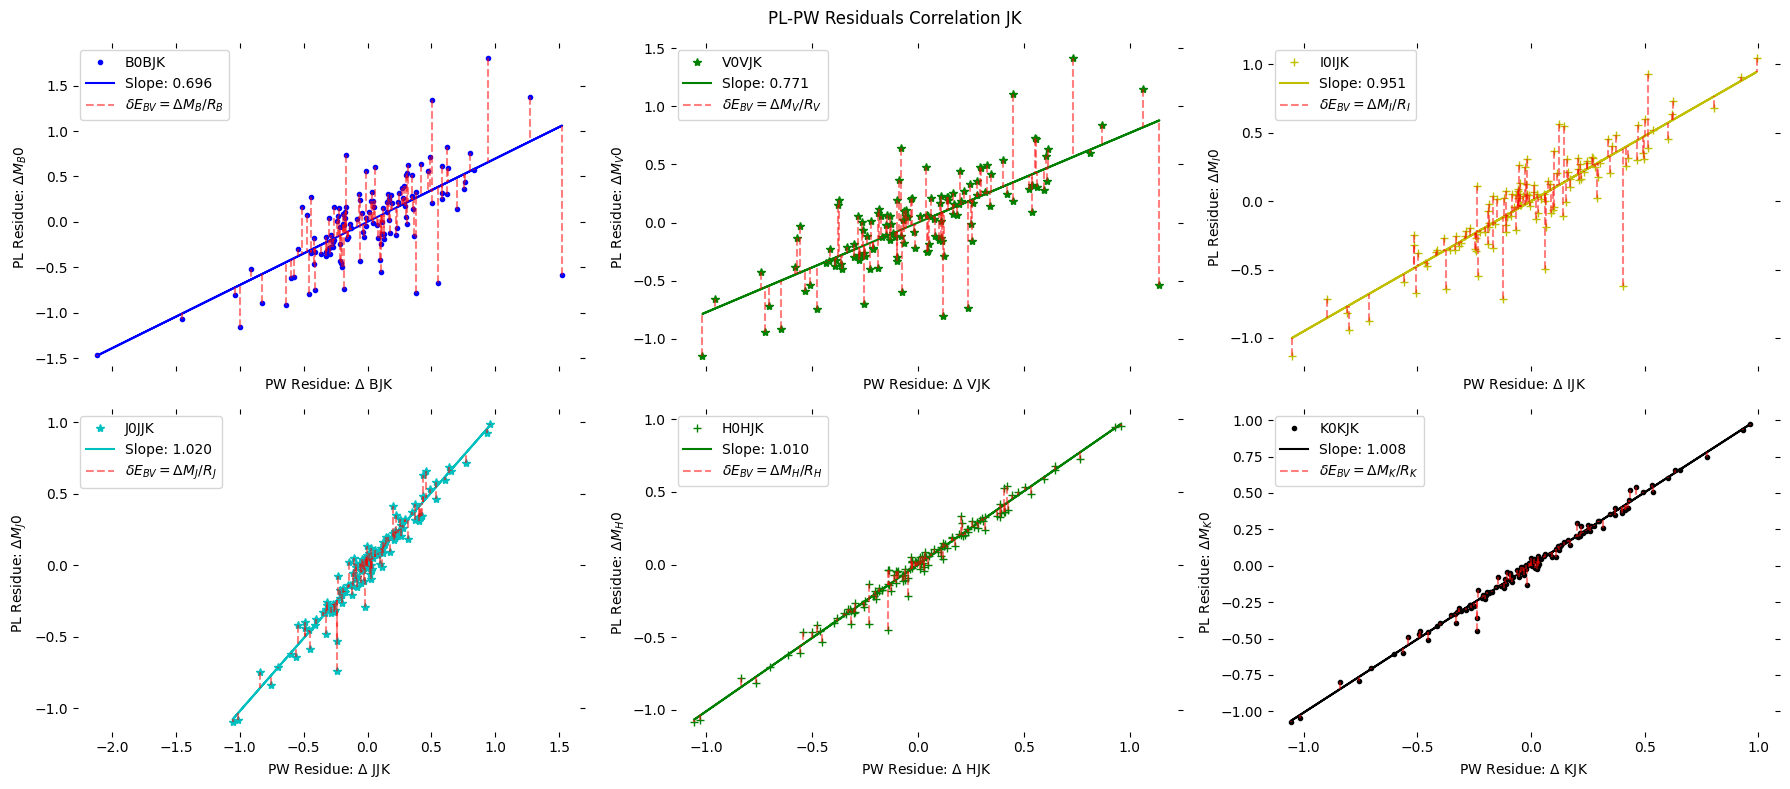

[None, None, None, None]

In [32]:
from lvtlaw.d_del_del import *
from lvtlaw.g_result import *
from lvtlaw.h_loadoutput import *
from data.datamapping import *
n=129
dis_flag = ['_p', '_j']
dis_list = ['IRSB', 'gplx']
file_name = f'{n}_IRSB_plx'
dd=['VI', 'IK', 'JH', 'JK']
data_out_p=f'./data/processed/{file_name}{dis_flag[0]}_{R_v}/'
data_out_j=f'./data/processed/{file_name}{dis_flag[1]}_{R_v}/'
#dmc, dpre, dres, merged_data = residual_correlation_(data_out_p, n) 
#[plotdeldel6(merged_data, dmc, col, dis_flag[0], 'S', '0', 0) for col in dd]

dmc, dpre, dres, merged_data = residual_correlation_(data_out_j, n) 
[plotdeldel6(merged_data, dmc, col, dis_flag[1], 'S', '0', 0) for col in dd]